In [1]:
from ultralytics import YOLO


In [2]:
import cv2


In [3]:

# Load a model
model = YOLO("yolo11n.yaml")  # build a new model from YAML
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolo11n.yaml").load("yolo11n.pt")  # build from YAML and transfer weights

# Train the model
results = model.train(data="coco8.yaml", epochs=100, imgsz=640)

Transferred 499/499 items from pretrained weights
Ultralytics 8.3.204  Python-3.11.9 torch-2.8.0+cpu CPU (12th Gen Intel Core i5-12450H)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=1

In [4]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category


Ultralytics 8.3.204  Python-3.11.9 torch-2.8.0+cpu CPU (12th Gen Intel Core i5-12450H)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access  (ping: 0.40.1 ms, read: 92.972.5 MB/s, size: 54.0 KB)
val: Scanning C:\Users\satya\datasets\coco8\labels\val.cache... 4 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 4/4 3.8Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.1it/s 0.9s
                   all          4         17      0.705      0.746      0.912      0.652
                person          3         10      0.764       0.65      0.666       0.33
                   dog          1          1      0.532          1      0.995      0.796
                 horse          1          2      0.722          1      0.995      0.676
              elephant          1          2      0.608      0.825      0.828      0.322
              umbrella          1          1  

array([    0.32955,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,       0.796,     0.67575,     0.65245,     0.65245,     0.32238,     0.65245,     0.65245,     0.65245,
           0.65245,      0.8955,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,
           0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,      0.8955,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,     0.65245,
           0.65245,     0.65245,     0.6524

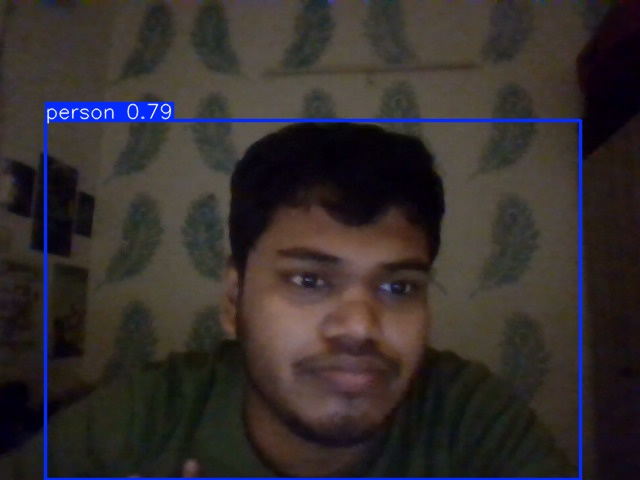

KeyboardInterrupt: 

In [11]:
from IPython.display import display, Image, clear_output

# Run webcam loop in Jupyter
for result in model.predict(source=0, stream=True, conf=0.5):
    frame = result.plot()  # annotated frame
    clear_output(wait=True)
    display(Image(data=cv2.imencode(".jpg", frame)[1].tobytes()))


In [15]:
model.save("object_blind_aide.pt")

In [ ]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml') 

# capture frames from a camera
cap = cv2.VideoCapture(0)

# loop runs if capturing has been initialized.
while 1: 

    # reads frames from a camera
    ret, img = cap.read() 

    # convert to gray scale of each frames
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detects faces of different sizes in the input image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x,y,w,h) in faces:
        # To draw a rectangle in a face 
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]

        # Detects eyes of different sizes in the input image
        eyes = eye_cascade.detectMultiScale(roi_gray) 

        #To draw a rectangle in eyes
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2)

    # Display an image in a window
    cv2.imshow('img',img)

    # Wait for Esc key to stop
    k = cv2.waitKey(30) & 0xff
    if k == 27:
        break

# Close the window
cap.release()

# De-allocate any associated memory usage
cv2.destroyAllWindows()